In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
gender_submission = pd.read_csv("../input/gender_submission.csv")

# Previous feature engineering.
data = pd.concat([train, test], sort=False)

data["Sex"] = data["Sex"].replace(
    {
        "male": 0,
        "female": 1
    }
)

data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"] = data["Embarked"].map(
    {
        "S": 0,
        "C": 1,
        "Q": 2,
    }
).astype(int)

data["Fare"] = data["Fare"].fillna(np.mean(data["Fare"]))

data["Age"] = data["Age"].fillna(data["Age"].median())

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

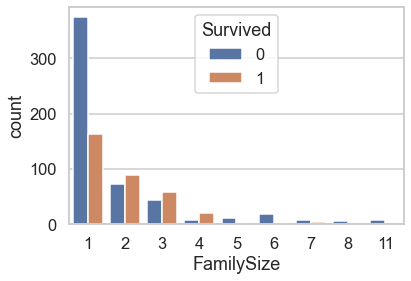

In [2]:
# Feature engeenering.
data["FamilySize"] = data["Parch"] + data["SibSp"] + 1
train["FamilySize"] = data["FamilySize"][:len(train)]
test["FamilySize"] = data["FamilySize"][len(train):]

import seaborn as sns
sns.set(context="talk", style="whitegrid")
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [3]:
data["IsAlone"] = 0
data["IsAlone"]  = (data["FamilySize"] == 1).astype(int)

train["IsAlone"] = data["IsAlone"][:len(train)]
test["IsAlone"] = data["IsAlone"][len(train):]

In [4]:
delete_columns = ["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"]
data = data.drop(delete_columns, axis=1)

train = data[:len(train)]
test = data[len(train):]

y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)
X_test = test.drop("Survived", axis=1)

In [5]:
from sklearn.linear_model import LogisticRegression

# Add 'IsAlone' and 'FamilySize'.
clf = LogisticRegression(penalty="l2", solver="sag", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

sub = gender_submission.copy()
sub["Survived"] = y_pred.astype(int)
sub.to_csv("../output/submission_familysize_isalone.csv", index=False)

/Users/omamatomoki/Soft/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
# Add 'IsAlone', not 'FamilySize'
clf = LogisticRegression(penalty="l2", solver="sag", random_state=0)

clf.fit(X_train.drop("FamilySize", axis=1), y_train)
y_pred = clf.predict(X_test.drop("FamilySize", axis=1))

sub = gender_submission.copy()
sub["Survived"] = y_pred.astype(int)
sub.to_csv("../output/submission_isalone.csv", index=False)

/Users/omamatomoki/Soft/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [7]:
# Add 'FamilySize', not 'IsAlone' 
clf = LogisticRegression(penalty="l2", solver="sag", random_state=0)

clf.fit(X_train.drop("IsAlone", axis=1), y_train)
y_pred = clf.predict(X_test.drop("IsAlone", axis=1))

sub = gender_submission.copy()
sub["Survived"] = y_pred.astype(int)
sub.to_csv("../output/submission_familysize.csv", index=False)

/Users/omamatomoki/Soft/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
